# Case Study-Titan Insurance Company-
The Titan Insurance Company has just installed a new incentive payment scheme for its lift policy sales force. It wants to have an early view of the success or failure of the new scheme. Indications are that the sales force is selling more policies, but sales always vary in an unpredictable pattern from month to month and it is not clear that the scheme has made a significant difference.

Life Insurance companies typically measure the monthly output of a salesperson as the total sum assured for the policies sold by that person during the month. For example, suppose salesperson X has, in the month, sold seven policies for which the sums assured are £1000, £2500, £3000, £5000, £10000, £35000. X's output for the month is the total of these sums assured, £61,500. Titan's new scheme is that the sales force receives low regular salaries but are paid large bonuses related to their output (i.e. to the total sum assured of policies sold by them). The scheme is expensive for the company, but they are looking for sales increases which more than compensate. The agreement with the sales force is that if the scheme does not at least break even for the company, it will be abandoned after six months.

The scheme has now been in operation for four months. It has settled down after fluctuations in the first two months due to the changeover.

To test the effectiveness of the scheme, Titan have taken a random sample of 30 salespeople measured their output in the penultimate month prior to changeover and then measured it in the fourth month after the changeover (they have deliberately chosen months not too close to the changeover). 

# Questions
1. Find the mean of old scheme and new scheme column. (5 points)
2. Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs? (10 points)
3. What conclusion does the test (p-value) lead to? (2.5 points)
4. Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the scheme compared to the old scheme. If this figure is alternative hypothesis, what is:

a) The probability of a type 1 error? (2.5 points)
b) What is the p- value of the hypothesis test if we test for a difference of $5000? (10 points)
c) Power of the test (5 points)

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro,wilcoxon
from statsmodels.stats.power import ttest_power

In [2]:
Titandata=pd.read_csv('Titan.csv')
Titandata.head()

,SALESPERSON,Old Scheme (in thousands),New Scheme (in thousands)
0,1,57,62
1,2,103,122
2,3,59,54
3,4,75,82
4,5,84,84


In [3]:
Titandata.set_index(['SALESPERSON']).head()

,Old Scheme (in thousands),New Scheme (in thousands)
SALESPERSON,,
1,57,62
2,103,122
3,59,54
4,75,82
5,84,84


In [4]:
Titandata.shape

(30, 3)

Sample Size: 30, No. of samples: 2

# 1. The mean of old scheme and new scheme column

In [5]:
Titandata[['Old Scheme (in thousands)','New Scheme (in thousands)']].mean(axis=0)

Old Scheme (in thousands)    68.033333
New Scheme (in thousands)    72.033333
dtype: float64

or

In [6]:
x1=Titandata[['Old Scheme (in thousands)']].mean(axis=0)
print("The mean of Old Scheme (In thousands) is:=",x1)

The mean of Old Scheme (In thousands) is:= Old Scheme (in thousands)    68.033333
dtype: float64


In [7]:
x2=Titandata[['New Scheme (in thousands)']].mean(axis=0)
print("The mean of New Scheme (In thousands) is:=",x2)

The mean of New Scheme (In thousands) is:= New Scheme (in thousands)    72.033333
dtype: float64


# Summary and Standard Deviation on both the samples

In [8]:
Titandata[['Old Scheme (in thousands)','New Scheme (in thousands)']].describe()

,Old Scheme (in thousands),New Scheme (in thousands)
count,30.000000,30.000000
mean,68.033333,72.033333
std,20.455980,24.062395
min,28.000000,32.000000
25%,54.000000,55.000000
50%,67.000000,74.000000
75%,81.500000,85.750000
max,110.000000,122.000000


In [9]:
std1=Titandata['Old Scheme (in thousands)'].std()
print("Standard Deviation of old scheme is:=",std1)

Standard Deviation of old scheme is:= 20.455980212074454


In [10]:
std2=Titandata['New Scheme (in thousands)'].std()
print("Standard Deviation of new scheme is:=",std2)

Standard Deviation of new scheme is:= 24.062394946777697


In [11]:
std_diff=std2-std1
print("The difference in standard deviation of both the scheme is :=",std_diff)

The difference in standard deviation of both the scheme is := 3.606414734703243


In [12]:
var1=Titandata['Old Scheme (in thousands)'].var()
print("Variance of old scheme is:=",var1)

Variance of old scheme is:= 418.4471264367816


In [13]:
var2=Titandata['New Scheme (in thousands)'].var()
print("Standard Deviation of new scheme is:=",var2)

Standard Deviation of new scheme is:= 578.9988505747128


# Histogram and Box Plot of both scheme

<function matplotlib.pyplot.show(*args, **kw)>

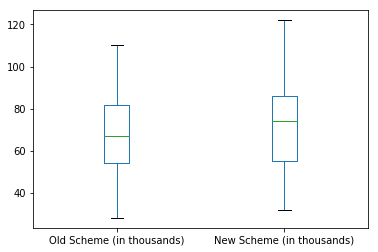

In [17]:
from scipy import stats
import matplotlib.pyplot as plt

Titandata[['Old Scheme (in thousands)','New Scheme (in thousands)']].plot(kind='box')
# This saves the plot as a png file
plt.savefig('boxplot_outliers.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

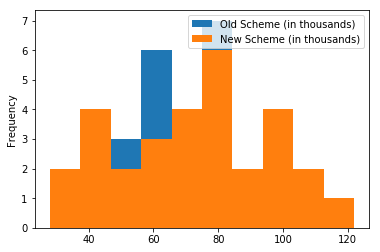

In [15]:
from scipy import stats
import matplotlib.pyplot as plt

Titandata[['Old Scheme (in thousands)','New Scheme (in thousands)']].plot(kind='hist')
# This saves the plot as a png file
plt.savefig('boxplot_outliers.png')
plt.show

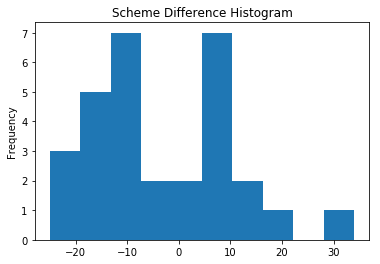

In [16]:
Titandata['scheme_difference'] = Titandata['Old Scheme (in thousands)'] - Titandata['New Scheme (in thousands)']

Titandata['scheme_difference'].plot(kind='hist', title= 'Scheme Difference Histogram')
#Again, this saves the plot as a png file
plt.savefig('scheme difference histogram.png')

# Observations:
1. Both the samples seems to be normally distributed.
2.  Mean and Median Values are not much different.

3. The Old scheme data looks more normally distributed, whereas the New scheme data looks left skewed. there is a dip in the
performance.

# 2.The five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs?

1.The level of significance (Alpha ) = 0.05.
2. The sample size , N = 30 which is sufficiently large for a Zstat Test.
3. But since the population standard deviation (Sigma) is unknown, we have to use a Tstat test.
4. Degree of Freedom: Since the sample is the same for both Sampling tests, we have N-1 degrees of freedom : 29
5. Since the sole purpose of the test is to check whether the New scheme is successful compared to old scheme, we would prefer a Right tailed Test. 

# It is asked that whether the new scheme has significantly raised the output, it is an example of the one-tailed t-test.
Note: Two-tailed test could have been used if it was asked “new scheme has significantly changed the output”

# Determine a null and alternate hypothesis.
In general, the null hypothesis will state that the two populations being tested have no statistically significant difference. The alternate hypothesis will state that there is one present. In this example we can say that:

H0 (Null Hypothesis)= Mean of Sales of salesperson before changeover 
H1 (Alternate Hypothesis)= Mean of sales of salesperson after changeover

μ1 = Average sums assured by salesperson BEFORE changeover. 
μ2 = Average sums assured by salesperson AFTER changeover.

H0: μ1 = μ2 ; μ2 – μ1 = 0 ( (New Scheme did not raise the output significantly)

HA: μ1 < μ2 ; μ2 – μ1 > 0 ; true difference of means is greater than zero. ((New Scheme raised the output significantly)

# Hypothesis Formulation
 Use the T Test: Paired two Sample for Means:

# T Test Equation: To conduct the paired sample t-test, one needs to use the stats.ttest_rel() method.


In [18]:
stats.ttest_rel(Titandata['Old Scheme (in thousands)'], Titandata['New Scheme (in thousands)'])

Ttest_relResult(statistic=-1.5559143823544377, pvalue=0.13057553961337662)

# What conclusion does the Test lead to ?

# Conclusion:
o In this scenario, the p value is 0.1305 which is greater than the 0.05. Hence reject the null hypothesis that the new scheme has raise the output significantly.

Answer: A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

p-values very close to the cutoff (0.05) are considered to be marginal (could go either way). Always report the p-value so we can draw their own conclusions.


# Suppose it has been calculated that for Titan to break even, the average output must increase by £5000. If this figure is an alternative hypothesis, what is:
(a) The probability of a type 1 error?

(b) What is the p-value of the hypothesis test if we test for a difference of $5000?

(c) Power of the test:

# a) The probability of a type 1 error? 

Solution : 

##Probability of Type I error = significant level = 0.05 or 5%

Type I error (𝜶): Probability of rejecting the null hypothesis when it is true. The probability of a Type I error in hypothesis testing is predetermined by the significance level.

Type II error (𝜷) : Probability of failing to reject null when it is false. Type II error calculation depends on the population mean which is unknown.

If alternate hypothesis 𝜇(New Scheme) – 𝜇(Old Scheme) = 𝜇𝑑 = £5000 is true. What is the type I and II error.
1. Null Hypothesis = 𝜇(New Scheme) – 𝜇(Old Scheme) = 𝜇𝑑 = 0
2.  First we need to calculate the probability of Type I error which is predetermined by significance level. If the significance level is 0.05,
3. then type I error is 0.05. i.e. 5% probability we make Type I error – rejecting null hypothesis when it is true.

# b)  What is the p-value of the hypothesis test if we test for a difference of 5000?

Type II error calculation depends on a particular value of 𝜇. In this case lets assume difference of population 𝜇 is £5K. Lets also assume that the significance level for the test is 0.05. Then the calculation is as below :

Solution:

Let  μ2 = Average sums assured by salesperson AFTER changeover.

μ1 = Average sums assured by salesperson BEFORE changeover.

μd = μ2 – μ1   H0: μd ≤ 5000  HA: μd > 5000

This is a right tail test.


In [19]:
t_statistic, p_value = ttest_1samp((Titandata['New Scheme (in thousands)'])-((Titandata['Old Scheme (in thousands)'].mean())+5),0)
print(t_statistic,p_value)

-0.2276259527435415 0.8215342661375447


It indicates weak evidence against null hypothesis,so null hypothesis can be accepted

# Power of the Test:
Power of the hypothesis test is 1 minus the probability of Type II error.
Basically the power of a test is the probability that we make the right decision
when the null is not correct (i.e. we correctly reject it)
 

In [20]:
x=(np.mean(Titandata['New Scheme (in thousands)'])-((Titandata['Old Scheme (in thousands)'].mean())+5))/np.std(Titandata['New Scheme (in thousands)'])
print(ttest_power(x,nobs=30,alpha=0.05,alternative='larger'))

0.03066951315752864
